In [ ]:
import numpy as np 
import pandas as pd #
import os
import numpy as np
import scipy.io
import cv2
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [ ]:
!wget http://www.robots.ox.ac.uk/~vgg/data/flowers/102/102flowers.tgz
!tar -xzf 102flowers.tgz
!rm 102flowers.tgz
!wget http://www.robots.ox.ac.uk/~vgg/data/flowers/102/imagelabels.mat

In [5]:
#set labels
img_labels = scipy.io.loadmat("imagelabels.mat")
img_labels = img_labels["labels"]
img_labels = img_labels[0]
for i in range(len(img_labels)):
  img_labels[i] = img_labels[i] - 1

In [9]:
import numpy as np
import cv2
import os

train_x = []
train_y = []
dir = "jpg/"
#iterate over the files in the specified directory
for imgs in os.listdir(dir):
    img_num = int(imgs[7:11]) - 1
    #appends the image label corresponding to the current image to the train_y list
    train_y.append(img_labels[img_num])
    image = cv2.imread(os.path.join(dir, imgs))
    #This step ensures that all images have the same dimensions.
    resized = cv2.resize(image, (150, 150))
    #ormalization process scales the pixel values of the image between 0 and 1
    normalized_img = cv2.normalize(resized, None, alpha=0, beta=1, 
                                  norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    #adds the normalized image to the train_x list
    train_x.append(normalized_img)
train_x = np.array(train_x)


In [10]:
X_train, x_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=10)

In [13]:
print('X_train Shape: ­{}'.format(X_train.shape))

X_train Shape: ­(6551, 150, 150, 3)


In [16]:
#normalizing the pixel values of the training and test images by dividing each pixel value by 255.0. 
#ensure that all pixel values are within a range of 0 to 1, which makes it easier for the model to learn.
training_images= X_train/255.0
test_images=x_test/255.0
'''
reshaping the training and test images to have a shape of (number of images, height, width, channels),
where the height and width are 150 pixels each and the number of channels is 3 (for RGB images).
'''
training_images = X_train.reshape((6551,150,150,3))
valx = x_test.reshape((1638,150,150,3))
#Converting to categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#ANN implementation
Define the model architecture: The next step is to define the architecture of the model. The Sequential model is instantiated, which represents a linear stack of layers.

Flatten layer: The Flatten layer is added as the first layer in the model. This layer flattens the input shape of (150, 150, 3) into a one-dimensional vector of size 67500. It is typically used to transform multi-dimensional input into a single dimension for compatibility with subsequent layers.

Dense layers: Three Dense layers are added to the model. These are fully connected layers, where each neuron is connected to every neuron in the previous layer. The first Dense layer has 128 neurons and uses the ReLU activation function, which introduces non-linearity to the model. The second Dense layer also has 128 neurons and uses ReLU activation.

Output layer: The final Dense layer is added with 102 neurons, corresponding to the number of classes in the classification problem. The activation function used is softmax, which converts the output into probabilities, allowing the model to provide a probability distribution over the classes.

In [42]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

# Define the model architecture
model = Sequential()
model.add(Flatten(input_shape=(150, 150, 3)))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(102, activation='softmax'))

# Compile the model
model.compile(optimizer='adagrad', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(training_images, y_train, epochs=50, batch_size=32, validation_data=(valx, y_test))

model.summary()

Train on 6551 samples, validate on 1638 samples
Epoch 1/50
6551/6551 [==============================] - 2s 324us/sample - loss: 4.5522 - acc: 0.0327 - val_loss: 4.4863 - val_acc: 0.0525
Epoch 2/50
6551/6551 [==============================] - 2s 302us/sample - loss: 4.4074 - acc: 0.0519 - val_loss: 4.3555 - val_acc: 0.0617
Epoch 3/50
6551/6551 [==============================] - 2s 283us/sample - loss: 4.2521 - acc: 0.0730 - val_loss: 4.2141 - val_acc: 0.0788
Epoch 4/50
6551/6551 [==============================] - 2s 300us/sample - loss: 4.0785 - acc: 0.0951 - val_loss: 4.0848 - val_acc: 0.0879
Epoch 5/50
6551/6551 [==============================] - 2s 363us/sample - loss: 3.8926 - acc: 0.1194 - val_loss: 3.9212 - val_acc: 0.1099
Epoch 6/50
6551/6551 [==============================] - 3s 385us/sample - loss: 3.7167 - acc: 0.1534 - val_loss: 3.8020 - val_acc: 0.1294
Epoch 7/50
6551/6551 [==============================] - 2s 312us/sample - loss: 3.5614 - acc: 0.1804 - val_loss: 3.6552 - va

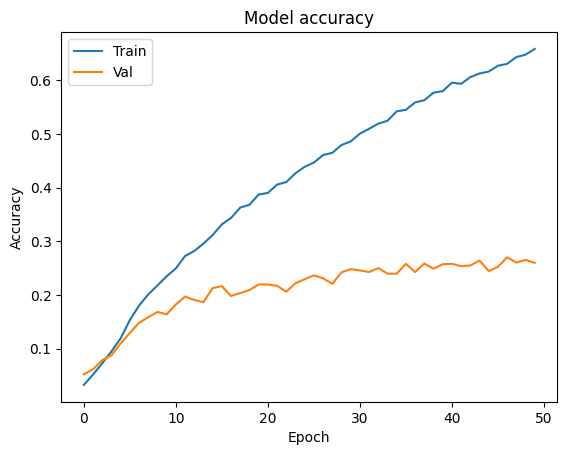

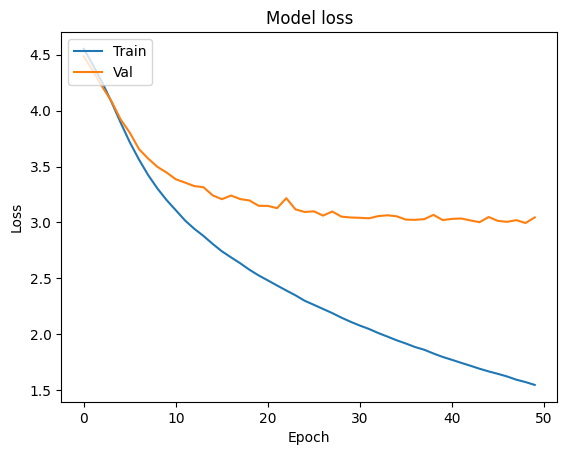

In [43]:
# Plot the training history
import matplotlib.pyplot as plt

# Plot the training and validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot the training and validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

#CNN implementation
In this implementation, we define an ANN model with three convolutional layers, followed by two fully connected layers. The convolutional layers extract features from the input images, while the fully connected layers perform the classification. The architecture of the model is as follows:

- Convolutional layer with 32 filters, kernel size of 3x3, and ReLU activation
- Max pooling layer with pool size of 2x2
- Convolutional layer with 64 filters, kernel size of 3x3, and ReLU activation
- Max pooling layer with pool size of 2x2
- Convolutional layer with 128 filters, kernel size of 3x3, and ReLU activation
- Max pooling layer with pool size of 2x2
- Flatten layer
- Fully connected layer with 512 units and ReLU activation
- Dropout layer with a rate of 0.5
- Fully connected layer with 102 units (one for each class) and softmax activation

The model is compiled with the categorical cross-entropy loss function, the AdaGrade optimizer with a learning rate of 0.001, and the accuracy metric.

In [33]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adagrad
import matplotlib.pyplot as plt

# Define the architecture of the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(102, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adagrad(lr=0.001), metrics=['accuracy'])

# Train the model
history = model.fit(training_images, y_train, batch_size=32, epochs=50, validation_data=(valx, y_test))

model.summary()

Train on 6551 samples, validate on 1638 samples
Epoch 1/50
6551/6551 [==============================] - 6s 954us/sample - loss: 4.5759 - acc: 0.0284 - val_loss: 4.5296 - val_acc: 0.0330
Epoch 2/50
6551/6551 [==============================] - 6s 864us/sample - loss: 4.5226 - acc: 0.0316 - val_loss: 4.4927 - val_acc: 0.0311
Epoch 3/50
6551/6551 [==============================] - 6s 947us/sample - loss: 4.4864 - acc: 0.0376 - val_loss: 4.4417 - val_acc: 0.0403
Epoch 4/50
6551/6551 [==============================] - 6s 882us/sample - loss: 4.4138 - acc: 0.0560 - val_loss: 4.3362 - val_acc: 0.0739
Epoch 5/50
6551/6551 [==============================] - 6s 898us/sample - loss: 4.3037 - acc: 0.0609 - val_loss: 4.1949 - val_acc: 0.0745
Epoch 6/50
6551/6551 [==============================] - 6s 882us/sample - loss: 4.1970 - acc: 0.0649 - val_loss: 4.0735 - val_acc: 0.0897
Epoch 7/50
6551/6551 [==============================] - 6s 891us/sample - loss: 4.0985 - acc: 0.0844 - val_loss: 3.9898 - va

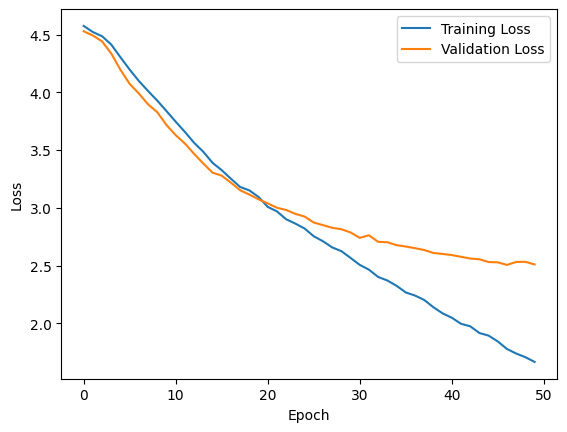

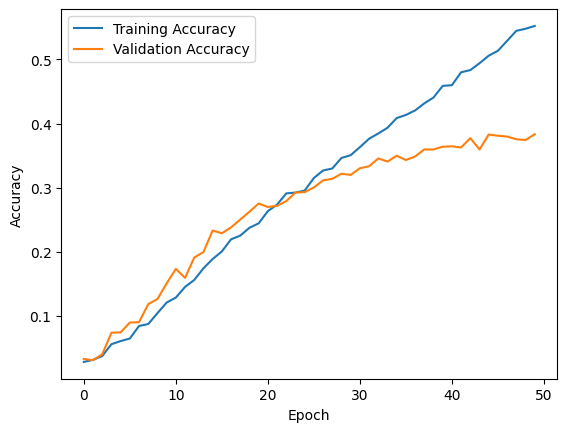

In [34]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

by using Adam optimizer, better acc will be achieve

test

In [23]:
model_cnn = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(102, activation='softmax')
])
# Compile the CNN model
model_cnn.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model
history_cnn = model_cnn.fit(training_images, y_train, batch_size=32, epochs=50, validation_data=(valx, y_test))

Train on 6551 samples, validate on 1638 samples
Epoch 1/50
6551/6551 [==============================] - 6s 942us/sample - loss: 3.9050 - acc: 0.0975 - val_loss: 3.2117 - val_acc: 0.2112
Epoch 2/50
6551/6551 [==============================] - 7s 1ms/sample - loss: 2.7786 - acc: 0.2842 - val_loss: 2.5026 - val_acc: 0.3272
Epoch 3/50
6551/6551 [==============================] - 6s 904us/sample - loss: 1.8519 - acc: 0.4924 - val_loss: 2.1665 - val_acc: 0.4487
Epoch 4/50
6551/6551 [==============================] - 6s 893us/sample - loss: 1.1093 - acc: 0.6808 - val_loss: 2.2009 - val_acc: 0.4646
Epoch 5/50
6551/6551 [==============================] - 6s 867us/sample - loss: 0.5271 - acc: 0.8429 - val_loss: 2.7701 - val_acc: 0.4414
Epoch 6/50
6551/6551 [==============================] - 6s 891us/sample - loss: 0.2876 - acc: 0.9115 - val_loss: 3.0473 - val_acc: 0.4542
Epoch 7/50
6551/6551 [==============================] - 6s 895us/sample - loss: 0.2038 - acc: 0.9388 - val_loss: 3.0688 - val_

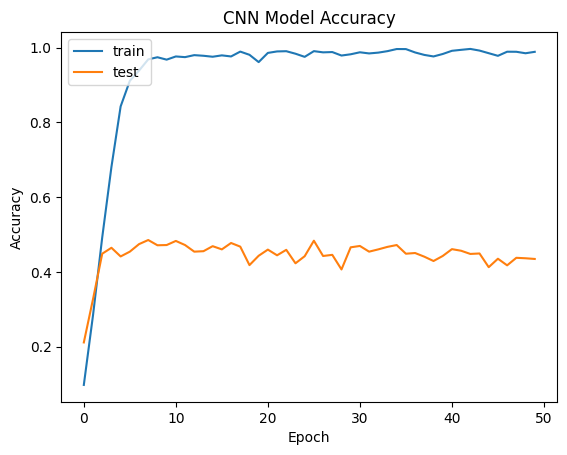

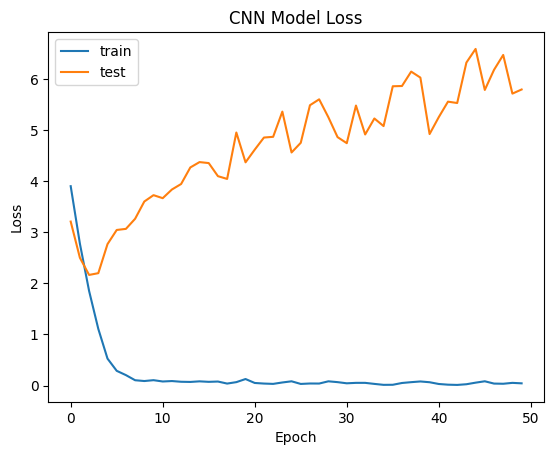

In [25]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy for the CNN model
plt.plot(history_cnn.history['acc'])
plt.plot(history_cnn.history['val_acc'])
plt.title('CNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Plot the training and validation loss for the CNN model
plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.title('CNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [27]:
from keras.models import Sequential
from keras.layers import Dense

# Define the ANN model
ann_model = Sequential()
ann_model.add(Flatten(input_shape=(150, 150, 3)))
ann_model.add(Dense(512, activation='relu'))
ann_model.add(Dense(256, activation='relu'))
ann_model.add(Dense(102, activation='softmax'))

# Compile the model
ann_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the summary of the model
ann_model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 67500)             0         
                                                                 
 dense_10 (Dense)            (None, 512)               34560512  
                                                                 
 dense_11 (Dense)            (None, 256)               131328    
                                                                 
 dense_12 (Dense)            (None, 102)               26214     
                                                                 
Total params: 34,718,054
Trainable params: 34,718,054
Non-trainable params: 0
_________________________________________________________________


In [26]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the CNN model
cnn_model = Sequential()
cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(128, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(128, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(512, activation='relu'))
cnn_model.add(Dense(102, activation='softmax'))

# Compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the summary of the model
cnn_model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 17, 17, 128)     

Train on 6551 samples, validate on 1638 samples
Epoch 1/30
6551/6551 [==============================] - 5s 823us/sample - loss: 0.0546 - acc: 0.9817 - val_loss: 5.3696 - val_acc: 0.3895
Epoch 2/30
6551/6551 [==============================] - 5s 818us/sample - loss: 0.0948 - acc: 0.9737 - val_loss: 4.9624 - val_acc: 0.4200
Epoch 3/30
6551/6551 [==============================] - 5s 807us/sample - loss: 0.0477 - acc: 0.9861 - val_loss: 5.4224 - val_acc: 0.4219
Epoch 4/30
6551/6551 [==============================] - 5s 833us/sample - loss: 0.0279 - acc: 0.9922 - val_loss: 5.0970 - val_acc: 0.4347
Epoch 5/30
6551/6551 [==============================] - 5s 807us/sample - loss: 0.0127 - acc: 0.9965 - val_loss: 5.8005 - val_acc: 0.4243
Epoch 6/30
6551/6551 [==============================] - 6s 851us/sample - loss: 0.0337 - acc: 0.9907 - val_loss: 5.9221 - val_acc: 0.4444
Epoch 7/30
6551/6551 [==============================] - 5s 806us/sample - loss: 0.0885 - acc: 0.9768 - val_loss: 5.3602 - va

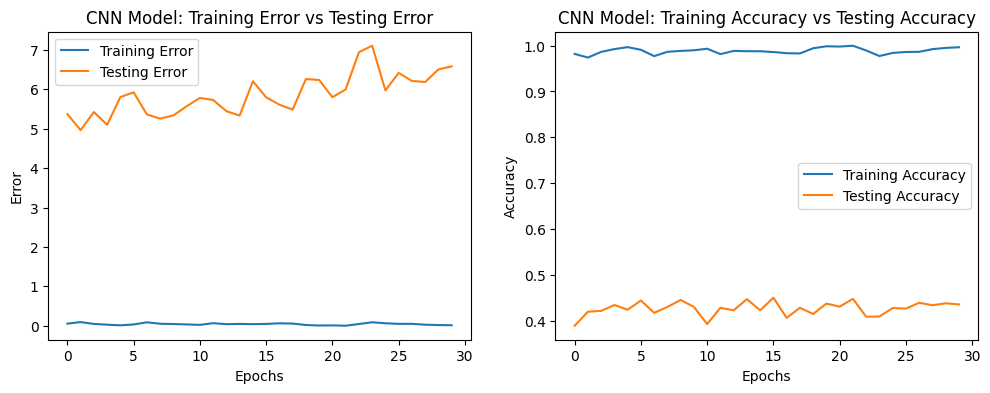

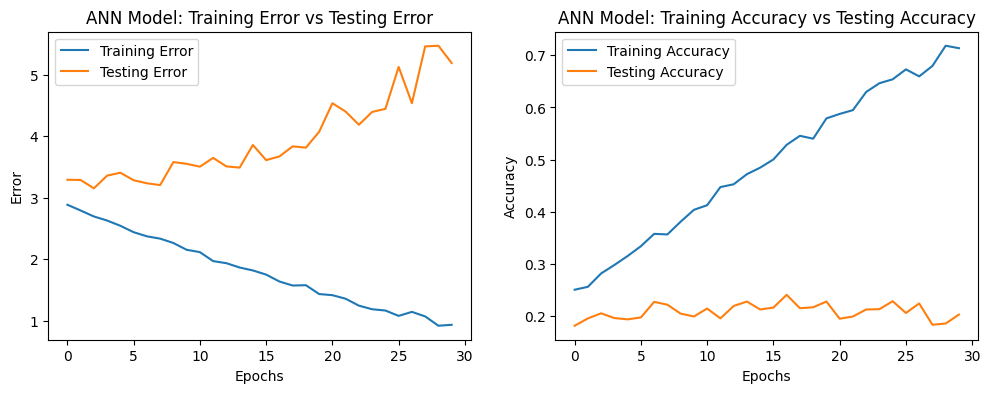

In [41]:
import matplotlib.pyplot as plt

# Train the CNN model
cnn_history = cnn_model.fit(training_images, y_train, validation_data=(valx, y_test), epochs=30, batch_size=32)

# Train the ANN model
ann_history = ann_model.fit(training_images, y_train,
                            validation_data=(valx, y_test),
                            epochs=30, batch_size=32)

# Plot the training error, testing error, and accuracy for the CNN model
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['loss'], label='Training Error')
plt.plot(cnn_history.history['val_loss'], label='Testing Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('CNN Model: Training Error vs Testing Error')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['acc'], label='Training Accuracy')
plt.plot(cnn_history.history['val_acc'], label='Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('CNN Model: Training Accuracy vs Testing Accuracy')
plt.legend()
plt.show()

# Plot the training error, testing error, and accuracy for the ANN model
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(ann_history.history['loss'], label='Training Error')
plt.plot(ann_history.history['val_loss'], label='Testing Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('ANN Model: Training Error vs Testing Error')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(ann_history.history['acc'], label='Training Accuracy')
plt.plot(ann_history.history['val_acc'], label='Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('ANN Model: Training Accuracy vs Testing Accuracy')
plt.legend()
plt.show()
